[*********************100%%**********************]  1 of 1 completed


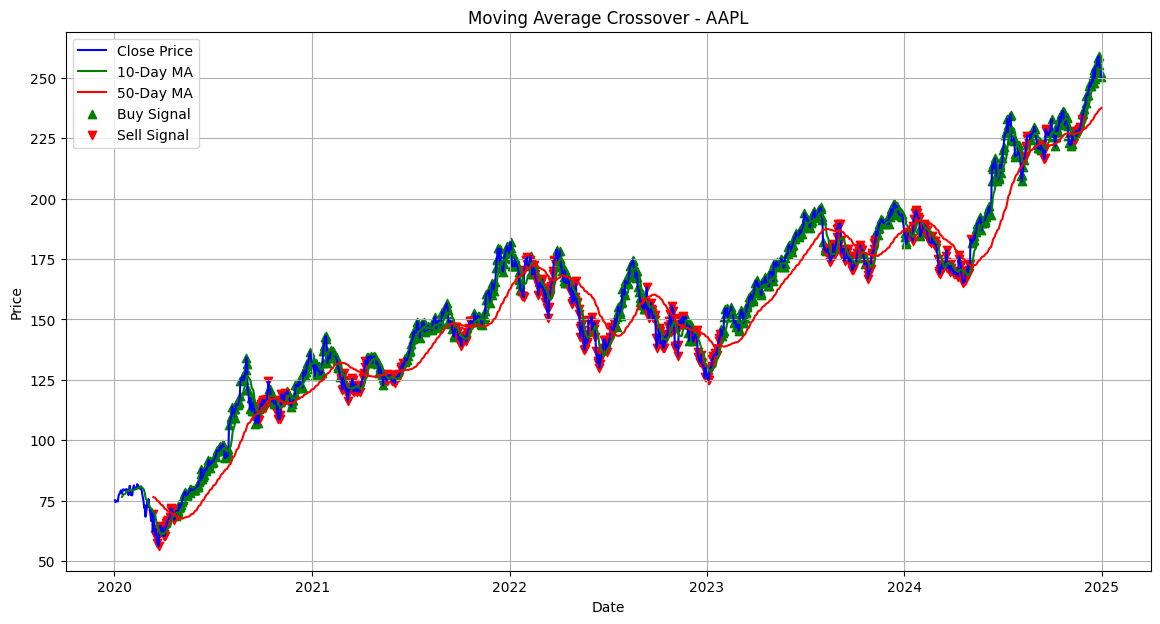

                  Open        High         Low       Close   Adj Close   
Date                                                                     
2024-12-24  255.490005  258.209991  255.289993  258.200012  258.200012  \
2024-12-26  258.190002  260.100006  257.630005  259.019989  259.019989   
2024-12-27  257.829987  258.700012  253.059998  255.589996  255.589996   
2024-12-30  252.229996  253.500000  250.750000  252.199997  252.199997   
2024-12-31  252.440002  253.279999  249.429993  250.419998  250.419998   

              Volume    Short_MA     Long_MA  Signal  
Date                                                  
2024-12-24  23234700  251.290002  235.914000       1  
2024-12-26  27237100  252.543001  236.417399       1  
2024-12-27  42355300  253.306000  236.893599       1  
2024-12-30  35557500  253.712999  237.294599       1  
2024-12-31  39480700  253.650999  237.602999       1  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download historical stock data
ticker = "AAPL"  # Replace with your preferred stock ticker
start_date = "2020-01-01"
end_date = "2025-01-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Calculate moving averages
short_window = 10  # Short-term moving average window
long_window = 50   # Long-term moving average window

data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

# Step 3: Generate buy and sell signals
data['Signal'] = 0
data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1  # Buy signal
data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1  # Sell signal

# Step 4: Visualize the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Short_MA'], label=f'{short_window}-Day MA', color='green')
plt.plot(data['Long_MA'], label=f'{long_window}-Day MA', color='red')

# Highlight buy and sell signals
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title(f'Moving Average Crossover - {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Optional: Save the signals for analysis
data[['Close', 'Short_MA', 'Long_MA', 'Signal']].to_csv('moving_average_signals.csv')

# Step 5: Print last few rows of the data
print(data.tail())


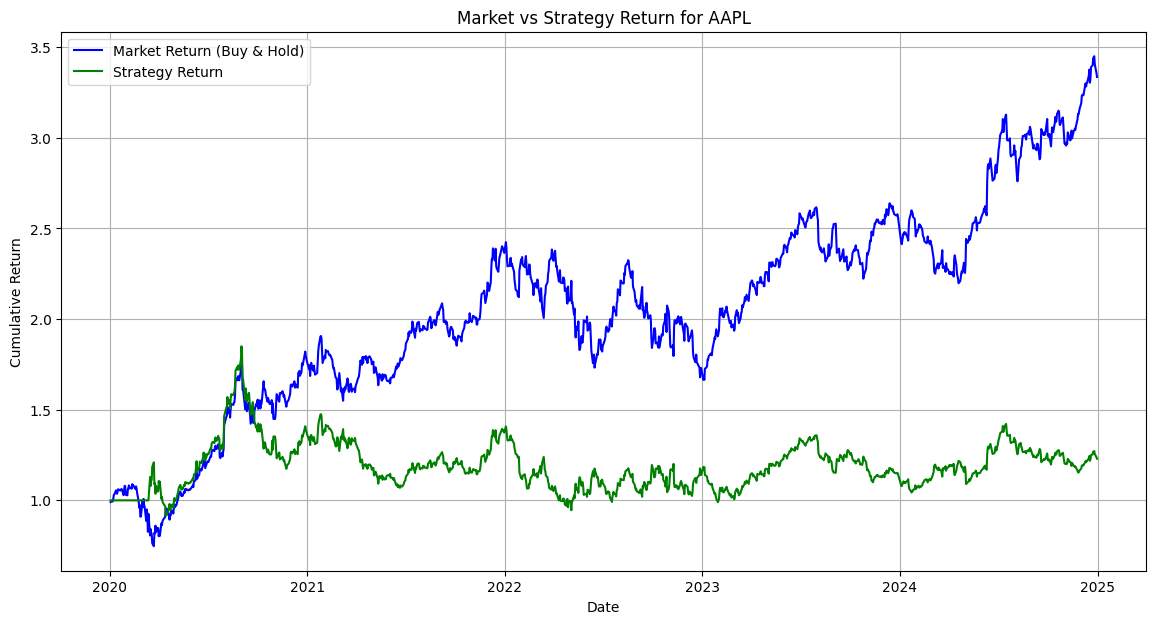

Final Market Return (Buy & Hold): 233.50%
Final Strategy Return: 22.97%


In [2]:
# Calculate Moving Averages
short_window = 10
long_window = 50
data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

# Generate Buy/Sell Signals
data['Signal'] = 0
data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1  # Buy Signal
data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1  # Sell Signal

# Shift the Signal column to align with next-day returns
data['Signal_Shifted'] = data['Signal'].shift(1)

# Calculate Daily Market Return
data['Market_Return'] = data['Close'].pct_change()

# Calculate Strategy Return
data['Strategy_Return'] = data['Signal_Shifted'] * data['Market_Return']

# Calculate Cumulative Returns
data['Cumulative_Market_Return'] = (1 + data['Market_Return']).cumprod()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plot the returns
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Return'], label='Market Return (Buy & Hold)', color='blue')
plt.plot(data['Cumulative_Strategy_Return'], label='Strategy Return', color='green')
plt.title(f'Market vs Strategy Return for {ticker}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

# Print final returns
final_market_return = data['Cumulative_Market_Return'].iloc[-1] - 1
final_strategy_return = data['Cumulative_Strategy_Return'].iloc[-1] - 1

print(f"Final Market Return (Buy & Hold): {final_market_return:.2%}")
print(f"Final Strategy Return: {final_strategy_return:.2%}")
